# 1) Defining the Question

## a) Specifying the Question

a) The objective is to build a model that predicts the price of houses given information on real estate propeties collected few months ago.

b) To exhibit the relationship between the different housing aspects and sale prices.

## b) Defining the Metric for Success

Successfully having a model that has a RMSE which is less than 10% of the mean of the housing prices.

## c) Understanding the context

As a Data Scientist, working for Hass Consulting Company which is a real estate leader with over 25 years of experience, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I will create a model that will allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## d) Recording the Experimental Design


1) Define the question, the metric for success, state the context and, record the experimental design taken.

2) Import the libraries, disable future warnings, read and, explore the dataset provided.

3) Define the appropriateness of the available data to answer the given question.

4) Find and deal with outliers, anomalies, and missing data within the dataset.

5) Perform univariate, bivariate and multivariate analysis recording the observations.

6) Perform regression analysis by integrating categorical independent variables into the models and check for multicollinearity.

7) Create residual plots for the models and assess heteroskedasticity using Barlett's test.

8) Challenge the solution by providing insights on how to improve the model.

## e) Data Relevance

A dataset containing the data with different aspects of housing has been provided for this project.

# 2) Import Libraries, Disable future warnings and set all floats to 2 decimal places

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# Disable future warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [ ]:
# Set all float results to have only two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 3) Load and Read Dataset

In [ ]:
# Loading the dataset
House_data = pd.read_csv('/content/House_data.csv')
House_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Check the top of the dataset
House_data.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [ ]:
# Check the bottom of the dataset
House_data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,325000.00,2,0.75,1020,1076,2.00,0,0,3,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


In [ ]:
# Determining the no. of records in our dataset
#--
House_data.shape

(21613, 20)

The dataset has 21613 rows and 20 columns 

In [ ]:
# Check the info of the dataset
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Data Cleaning

In [ ]:
# Check for duplicates in the dataset
print('Number of duplicates before cleaning: '+str(House_data.duplicated().sum()))

# Drop duplicates
House_data = House_data.drop_duplicates()

# Confirm that the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(House_data.duplicated().sum()))

Number of duplicates before cleaning: 3
Number of duplicates after cleaning: 0


In [ ]:
# Drop irrelevant columns
House_data.drop(['id', 'long', 'lat' ], axis=1, inplace=True)

# Preview the changes in the dataset
House_data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062


The longitude and latitude columns were irrelevant since zipcode column contains data on location.

In [ ]:
# Check for missing values
House_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Create a new column 'last_modified' that tells when the house was last modified
# and drop 'yr_built' and 'yr_renovated' columns

# Create a function that defines the status of the match
def year (x):
   if x['yr_renovated'] != 0:
      return x['yr_renovated']
   return x['yr_built']

# Add a new column and apply the function
House_data['last_modified'] = (House_data.apply (lambda x: year(x), axis=1)).astype(int)

# Drop 'yr_built' and 'yr_renovated'
House_data.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)
House_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,2009
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,2014
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,2009
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,1410,1287,2004


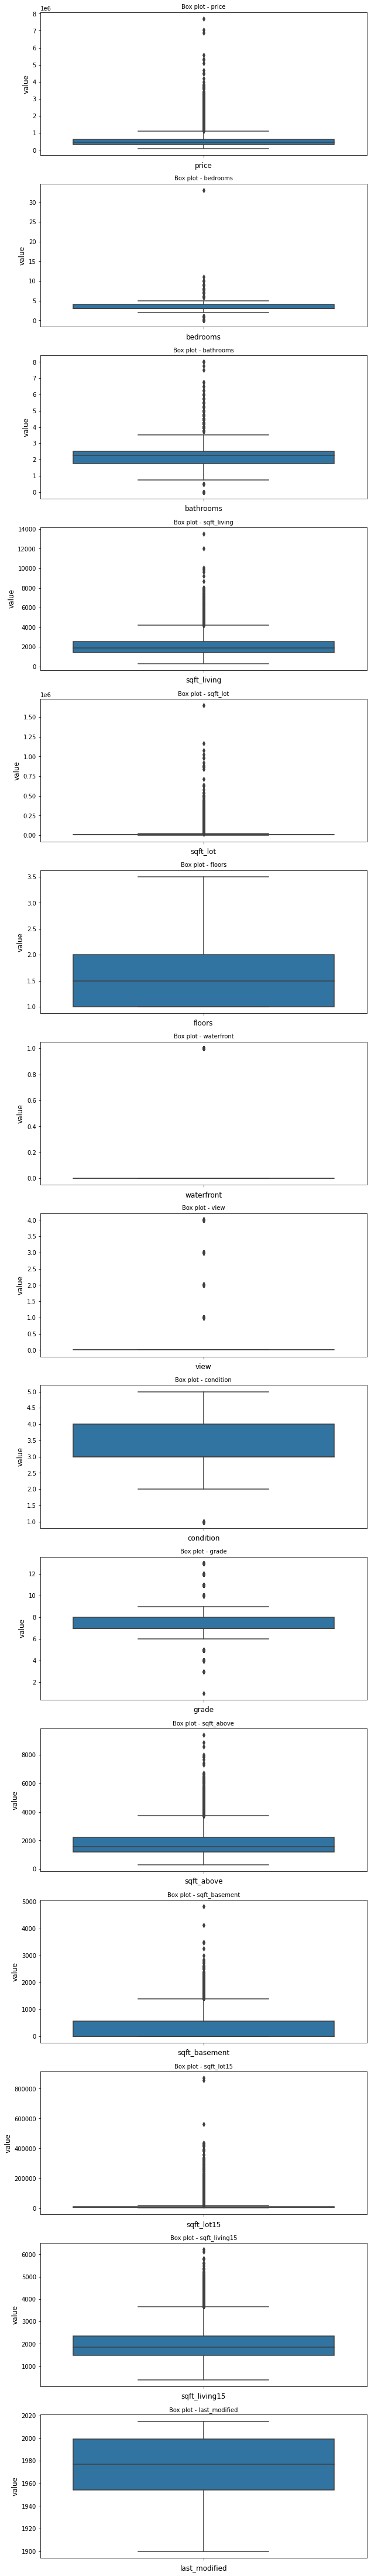

In [ ]:
# Checking for outliers
col_names = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
             'waterfront','view','condition','grade','sqft_above','sqft_basement'
             ,'sqft_lot15', 'sqft_living15', 'last_modified']

fig,ax = plt.subplots(len(col_names),figsize=(10,80))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=House_data[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=12)
  ax[i].set_ylabel('value', fontsize=12)
plt.show()

There wil be no need to remove the outliers.

# 4) Data analysis

## 4.1) Univariate Analysis

In [ ]:
# Check the statistical summaries of the numerical variables
House_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,1986.552492,12768.455652,1973.386018
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,685.391304,27304.179631,28.806854
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,1954.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,1977.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,1999.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,2015.000000


In [ ]:
# Check the skewness of the quantitative variables
Numeric_vars = ['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
Skewed_vars = House_data[Numeric_vars].skew()

Skewed_vars.sort_values(ascending=False)

sqft_lot         13.060019
sqft_lot15        9.506743
price             4.021716
view              3.395750
bedrooms          1.974300
sqft_basement     1.577965
sqft_living       1.471555
sqft_above        1.446664
sqft_living15     1.108181
floors            0.616177
bathrooms         0.511108
dtype: float64

As seen, all the variables are highly skewed while floors and bathrooms are moderately skewed. 

## 4.2) Bivariate Analysis

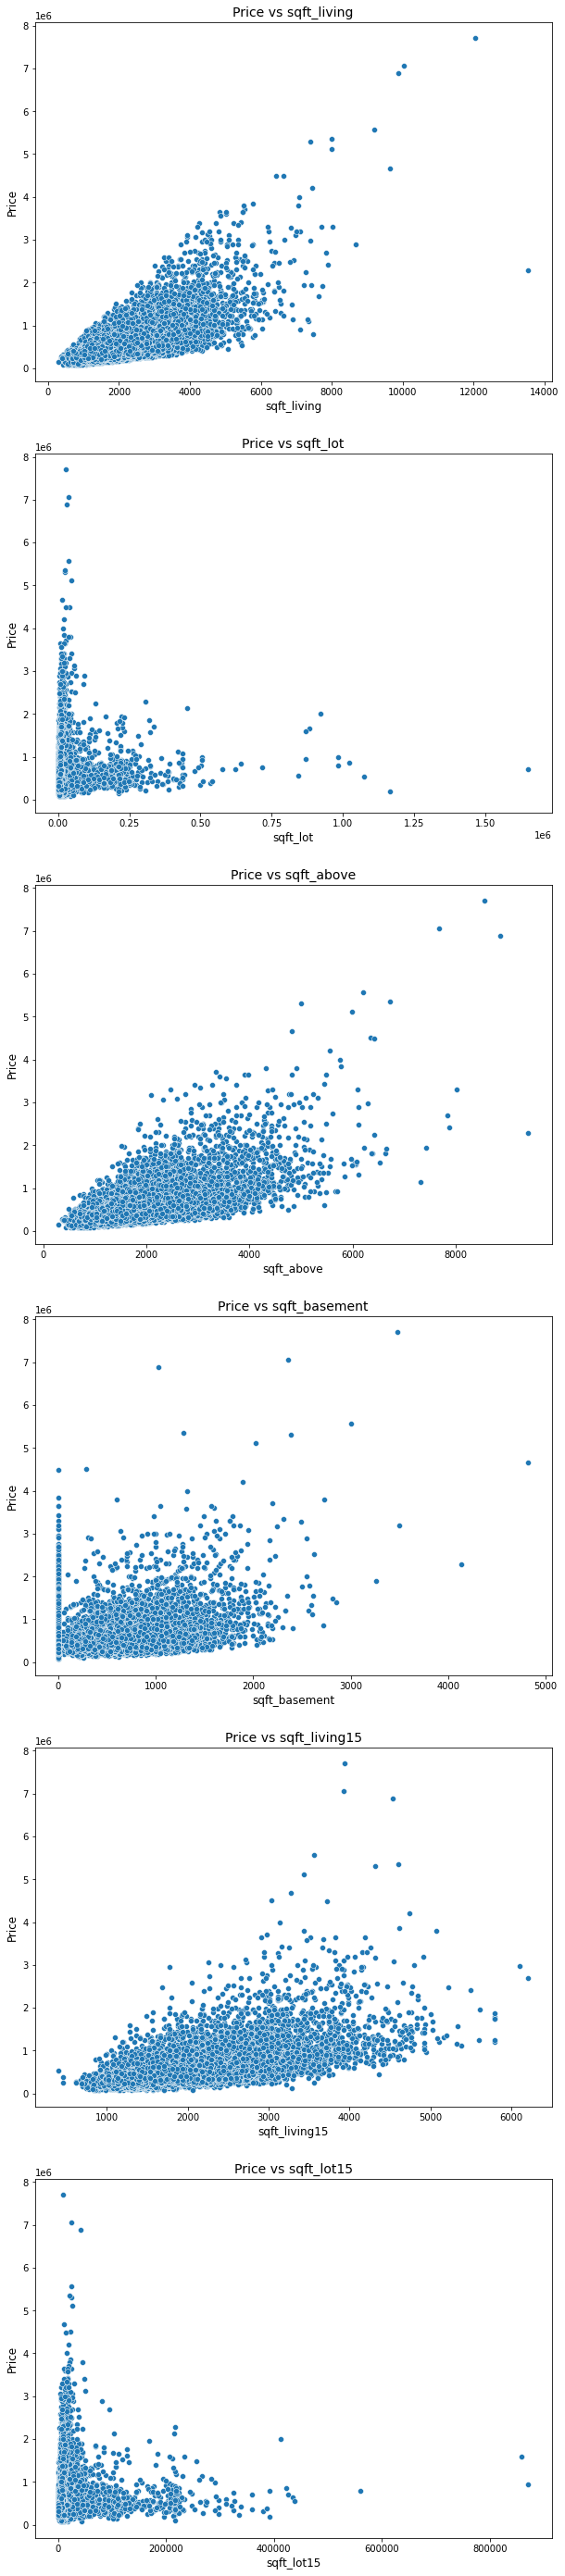

In [ ]:
# Let's investigate the relationship between the different variables and house
#  prices and plot scatter plots
col_names= ['sqft_living',	'sqft_lot', 'sqft_above', 'sqft_basement', 
            'sqft_living15',	'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(10,50))

for i, col_val in enumerate(col_names):

    sns.scatterplot(y=House_data.price, x=House_data[col_val], ax=ax[i])
    ax[i].set_title('Price vs {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Price', fontsize=12)

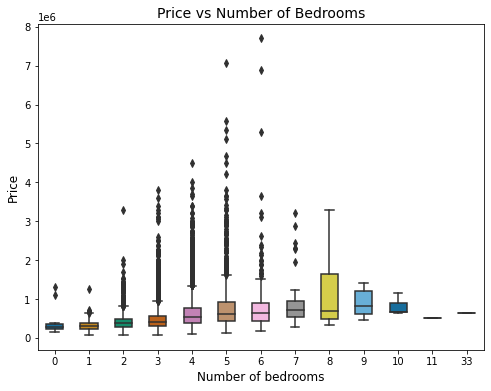

correlation coefficient  0.30833836868809633


In [ ]:
# Plot boxplot that shows relationship between price and bedrooms
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=House_data.price, x=House_data.bedrooms, width=0.5,palette="colorblind")
plt.title('Price vs Number of Bedrooms', fontsize=14)
plt.xlabel('Number of bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Print correlation coefficient
print('correlation coefficient ', House_data["price"].corr(House_data["bedrooms"]))

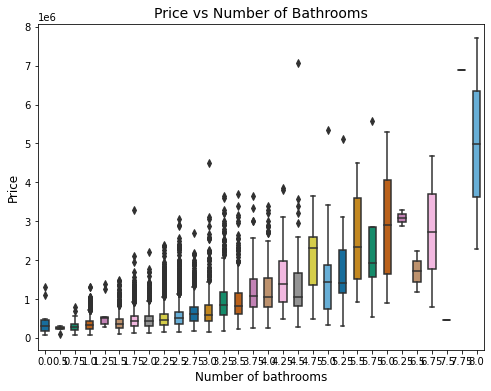

correlation coefficient  0.5251340727456005


In [ ]:
# Plot boxplot that shows relationship between price and bathrooms
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=House_data.price, x=House_data.bathrooms, width=0.5,palette="colorblind")
plt.title('Price vs Number of Bathrooms', fontsize=14)
plt.xlabel('Number of bathrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Print correlation coefficient
print('correlation coefficient ', House_data["price"].corr(House_data["bathrooms"]))

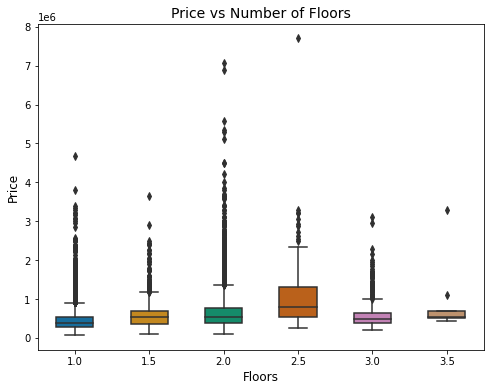

correlation coefficient  0.25678570497551195


In [ ]:
# Plot boxplot that shows relationship between price and floors
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=House_data.price, x=House_data.floors, width=0.5,palette="colorblind")
plt.title('Price vs Number of Floors', fontsize=14)
plt.xlabel('Floors', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()
print('correlation coefficient ', House_data["price"].corr(House_data["floors"]))

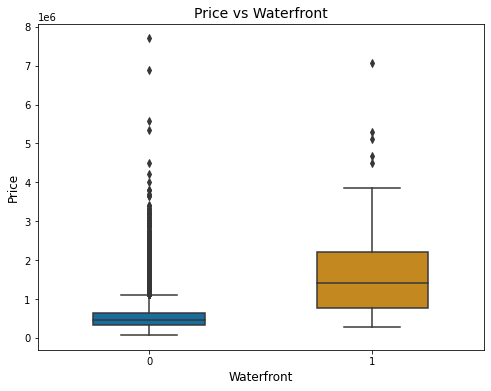

correlation coefficient  0.2663305105222566


In [ ]:
# Plot boxplot that shows relationship between price and waterfront
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=House_data.price, x=House_data.waterfront, width=0.5,palette="colorblind")
plt.title('Price vs Waterfront', fontsize=14)
plt.xlabel('Waterfront', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Print correlation coefficient
print('correlation coefficient ', House_data["price"].corr(House_data["waterfront"]))

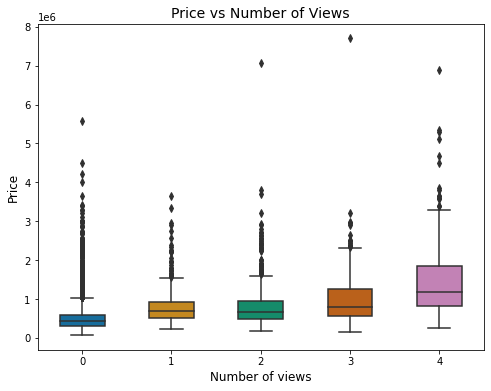

correlation coefficient  0.3973464743789392


In [57]:
# Plot boxplot that shows relationship between price and views
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=House_data.price, x=House_data.view, width=0.5,palette="colorblind")
plt.title('Price vs Number of Views', fontsize=14)
plt.xlabel('Number of views', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Print correlation coefficient
print('correlation coefficient ', House_data["price"].corr(House_data["view"]))

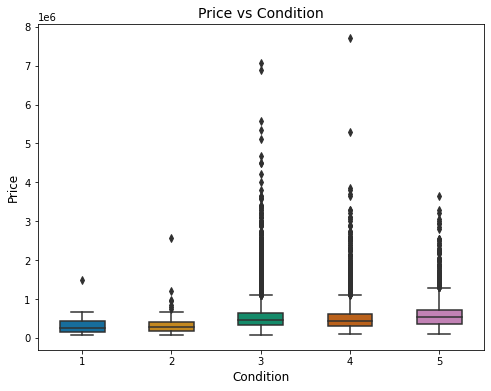

correlation coefficient  0.036391921410228185


In [58]:
# Plot boxplot that shows relationship between price and condition
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y= House_data.price, x= House_data.condition, width=0.5,palette="colorblind")
plt.title('Price vs Condition', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Print correlation coefficient
print('correlation coefficient ', House_data["price"].corr(House_data["condition"]))

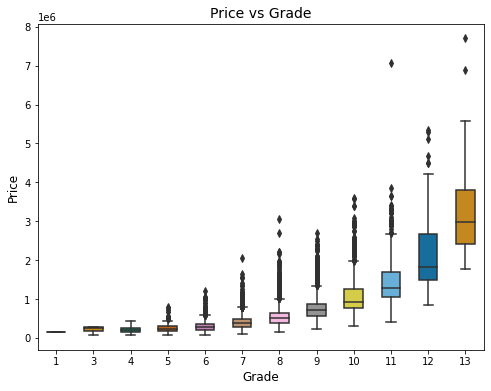

correlation coefficient  0.6674627402178577


In [60]:
# Plot boxplot that shows relationship between price and grade
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=House_data.price, x=House_data.grade, width=0.5,palette="colorblind")
plt.title('Price vs Grade', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Print correlation coefficient
print('correlation coefficient ', House_data["price"].corr(House_data["grade"]))

# 4.3) Multicollinearity check

In [61]:
# Lets put all the independent variables in one subset
independent_variables = House_data.drop(['price',], axis=1)

# Find the correlations between the variables
correlations = independent_variables.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,0.165506
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,0.537164
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,0.343745
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,0.052911
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,0.505408
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,-0.000537
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,-0.018264
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,-0.396358
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,0.460796
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,-0.261190,0.731870,0.194050,0.435904


We will use the correlations above to compute variance inflation factors to measure of the amount of multicollinearity.

In [62]:
# Create a dataframe that shows the VIF scores of the variables
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, 
             columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
bedrooms,1.649337,-0.459671,2.413334e-02,0.048629,0.052819,0.063432,0.107783,-0.053066,0.316713,-9.064830e-01,-4.784972e-01,0.083627,0.035135,0.085951,0.122688
bathrooms,-0.459671,3.354184,-3.193711e-01,-0.019454,-0.678562,0.006070,-0.034369,-0.146088,-0.288648,-9.687591e-01,-9.048849e-01,0.020434,0.082449,0.076429,-0.895354
sqft_living,0.019713,-0.297736,-1.486117e+14,-0.211180,1.896469,-0.026338,0.067946,0.209192,0.438753,1.339923e+14,7.161248e+13,-0.448496,-0.055134,0.465230,0.278297
sqft_lot,0.048629,-0.019454,-2.132190e-01,2.091071,0.061337,0.029125,-0.058710,0.028387,-0.013390,-3.852026e-02,7.278004e-02,0.061226,0.143379,-1.472133,0.051030
floors,0.052819,-0.678562,1.901810e+00,0.061337,1.986778,-0.005459,-0.029157,0.088033,-0.299149,-2.166866e+00,-3.138193e-01,-0.257738,0.281705,0.090003,-0.401154
waterfront,0.063432,0.006070,-2.847644e-02,0.029125,-0.005459,1.199583,-0.499044,-0.008383,0.049359,-8.870019e-02,4.440280e-03,0.011548,0.065976,-0.016887,-0.014663
view,0.107783,-0.034369,7.461704e-02,-0.058710,-0.029157,-0.499044,1.411420,-0.026054,-0.159163,-4.353892e-02,-3.009527e-01,-0.152540,-0.290572,-0.003737,0.115411
condition,-0.053066,-0.146088,2.097038e-01,0.028387,0.088033,-0.008383,-0.026054,1.255098,-0.044482,-1.367317e-01,-1.961271e-01,0.180971,0.086625,-0.030427,0.558016
grade,0.316713,-0.288648,4.525432e-01,-0.013390,-0.299149,0.049359,-0.159163,-0.044482,3.244112,-1.891958e+00,-7.428796e-01,-0.133789,-0.880155,0.113675,-0.433758
sqft_above,-0.896689,-0.986542,1.339923e+14,-0.040055,-2.161551,-0.090710,-0.038169,-0.135707,-1.876983,-1.208111e+14,-6.456774e+13,0.486769,-1.519159,-0.628850,0.101762


We need to see if the scores will improve once we remove the 'sqft_living' as it's VIF scores are very high.

In [63]:
# Drop columns 
Living = House_data.drop(['price', 'sqft_living'], axis=1)

# Determine the pearson correlation values
correlations = Living.corr()

# create a dataframe that shows the VIF scores of the variables
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
bedrooms,1.649337,-0.459671,0.048629,0.052819,0.063432,0.107783,-0.053066,0.316713,-0.878915,-0.484173,0.083627,0.035135,0.085951,0.122688
bathrooms,-0.459671,3.354184,-0.019454,-0.678562,0.006070,-0.034369,-0.146088,-0.288648,-1.254989,-1.071971,0.020434,0.082449,0.076429,-0.895354
sqft_lot,0.048629,-0.019454,2.091071,0.061337,0.029125,-0.058710,0.028387,-0.013390,-0.230461,-0.029516,0.061226,0.143379,-1.472133,0.051030
floors,0.052819,-0.678562,0.061337,1.986778,-0.005459,-0.029157,0.088033,-0.299149,-0.451643,0.604143,-0.257738,0.281705,0.090003,-0.401154
waterfront,0.063432,0.006070,0.029125,-0.005459,1.199583,-0.499044,-0.008383,0.049359,-0.114457,-0.009286,0.011548,0.065976,-0.016887,-0.014663
view,0.107783,-0.034369,-0.058710,-0.029157,-0.499044,1.411420,-0.026054,-0.159163,0.023093,-0.265814,-0.152540,-0.290572,-0.003737,0.115411
condition,-0.053066,-0.146088,0.028387,0.088033,-0.008383,-0.026054,1.255098,-0.044482,0.052906,-0.094964,0.180971,0.086625,-0.030427,0.558016
grade,0.316713,-0.288648,-0.013390,-0.299149,0.049359,-0.159163,-0.044482,3.244112,-1.481391,-0.522730,-0.133789,-0.880155,0.113675,-0.433758
sqft_above,-0.878915,-1.254989,-0.230461,-0.451643,-0.114457,0.023093,0.052906,-1.481391,4.818408,1.356277,0.082393,-1.568869,-0.209386,0.352683
sqft_basement,-0.484173,-1.071971,-0.029516,0.604143,-0.009286,-0.265814,-0.094964,-0.522730,1.356277,1.976275,-0.175985,-0.437144,-0.043494,0.249965


# 5) Modelling

In [64]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to 
# variable X and the label to variable y 
X = House_data.drop(['price', 'sqft_living'], axis=1)
y = House_data["price"]

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)

from sklearn.preprocessing import MinMaxScaler

#scaled_data = MinMaxScaler()
#X = scaler.fit_transform(X)

# Splitting our Data into Training and Test sets

# Import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# Split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


The above splits 80% of the data to training set and 20% of the data to test set.

In [65]:
# Training the Algorithm

# Import linear regression model
from sklearn.linear_model import LinearRegression

# Instantiate the model
linear = LinearRegression()

# Train the algorithm by fitting it to our training data 
linear.fit(X_train, y_train)

LinearRegression()

In [66]:
# Print the regressor intercept and coefficients for the predictor variables.
print('Intercept: ',linear.intercept_)
print('Coefficients: ',linear.coef_)

Intercept:  13.048515277540643
Coefficients:  [-0.01873252  0.05154333  0.00833462  0.05871849  0.03071927  0.03322871
  0.03001928  0.23115051  0.09334449  0.09127551  0.0282634   0.07779634
 -0.01250213 -0.12743885]


In [67]:
# Making Predictions

# Obtain the trained model's predictions of the based on X_test 
y_pred = linear.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)

# Create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# Display top records in the comparison dataframe
df.head(5)


,Actual,Prediction,Error
20999,12.775639,12.943861,0.168222
20641,12.860869,13.062277,0.201408
7065,12.736701,13.066954,0.330253
21068,12.901592,13.282261,0.380669
6715,13.308013,12.959989,-0.348024


In [68]:
# Computing the R-score and RMSE

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
#print('R Squared Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.24390237903968243
Mean Squared Error: 0.09576534025962857
Root Mean Squared Error: 0.3094597554765863


The RMSE score is less than 10% of the mean of all house prices. This means that out model is good at predicting house prices given the predictive variables.

## Residual Plots

In [69]:
#Step 1
# Create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

#Step 2
# Statistical description
residual = pd.DataFrame(residuals).describe()

#Step 3
# Compute the mean of the residuals 
residuals.mean()

0.0031456320686468558

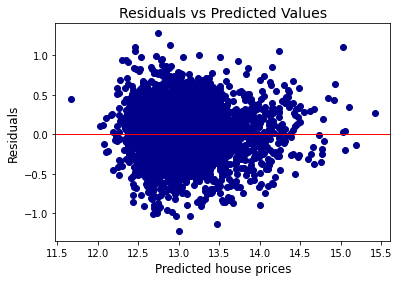

In [70]:
#Step 4
# Create residual scatter plot of residuals vs predicted values
plt.scatter(y_pred, residuals, color = 'darkblue')

plt.title('Residuals vs Predicted Values', fontsize = 14,)
plt.ylabel('Residuals', fontsize = 12)
plt.xlabel('Predicted house prices', fontsize = 12)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

There is a normal distribution in the residuals.

## Heteroskedasticity test using Bartlett's test

In [71]:
import scipy as sp

# Compute the test result and p-value of the test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("The variances are unequal and the model should be reassessed")
else:
    print("The variances are homogeneous")

The variances are homogeneous


## Constraints of Linear Regression

i) Linear Regression Only Looks at the Mean of the Dependent Variable - Linear regression looks at a relationship between the mean of the dependent variable and the independent variables. Just as the mean is not a complete description of a single variable, linear regression is not a complete description of relationships among variables.

ii) Linear Regression Is Sensitive to Outliers - Outliers can be univariate (based on one variable) or multivariate thus they can have a huge effect.

iii) Data must be independent - Linear regression assumes that the data are independent. That means that the scores of one subject have nothing to do with those of another.

## Recommendation

Use Principal Component Analysis which is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

# 6) Quantile Regression

In [72]:
House_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'last_modified'],
      dtype='object')

In [74]:
# Defining the range of the quantiles
quantiles = np.arange(0.1, 1.0, 0.1)
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above', data = House_data)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2372
Model:                       QuantReg   Bandwidth:                   2.467e+04
Method:                 Least Squares   Sparsity:                    4.660e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:22   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.343e+05   9302.782    -35.933      0.000   -3.53e+05   -3.16e+05
bedrooms    -1.504e+04   1209.590    -12.437      0.000   -1.74e+04   -1.27e+04
bathrooms     500.4499   1970.546      0.254      0.800   -3361.966    4362.865
sqft_living    98.8922      2.982     33.158   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2583
Model:                       QuantReg   Bandwidth:                   2.357e+04
Method:                 Least Squares   Sparsity:                    4.167e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:26   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.575e+05   1.12e+04    -40.815      0.000   -4.79e+05   -4.36e+05
bedrooms    -2.146e+04   1434.344    -14.964      0.000   -2.43e+04   -1.87e+04
bathrooms   -1.062e+04   2378.826     -4.464      0.000   -1.53e+04   -5955.854
sqft_living   129.2306      3.573     36.168   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2830
Model:                       QuantReg   Bandwidth:                   2.472e+04
Method:                 Least Squares   Sparsity:                    3.966e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:29   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.483e+05   1.29e+04    -26.913      0.000   -3.74e+05   -3.23e+05
bedrooms    -3.833e+04   1595.539    -24.026      0.000   -4.15e+04   -3.52e+04
bathrooms    -1.59e+04   2652.893     -5.993      0.000   -2.11e+04   -1.07e+04
sqft_living   163.0424      3.894     41.868   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3163
Model:                       QuantReg   Bandwidth:                   2.589e+04
Method:                 Least Squares   Sparsity:                    3.930e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:32   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -5.45e+05    1.4e+04    -39.025      0.000   -5.72e+05   -5.18e+05
bedrooms    -2.609e+04   1736.324    -15.027      0.000   -2.95e+04   -2.27e+04
bathrooms   -2.121e+04   2860.382     -7.415      0.000   -2.68e+04   -1.56e+04
sqft_living   161.4672      4.057     39.796   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3438
Model:                       QuantReg   Bandwidth:                   2.642e+04
Method:                 Least Squares   Sparsity:                    3.825e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:34   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.682e+05   1.44e+04    -39.378      0.000   -5.96e+05    -5.4e+05
bedrooms    -2.738e+04   1788.788    -15.304      0.000   -3.09e+04   -2.39e+04
bathrooms   -2.634e+04   2890.168     -9.113      0.000    -3.2e+04   -2.07e+04
sqft_living   179.8860      3.996     45.016   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3310
Model:                       QuantReg   Bandwidth:                   2.757e+04
Method:                 Least Squares   Sparsity:                    4.261e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:37   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9980.5126    1.6e+04      0.625      0.532   -2.13e+04    4.13e+04
bedrooms    -6.868e+04   2028.903    -33.850      0.000   -7.27e+04   -6.47e+04
bathrooms   -4.624e+04   3219.349    -14.363      0.000   -5.26e+04   -3.99e+04
sqft_living   285.7359      4.321     66.130   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3945
Model:                       QuantReg   Bandwidth:                   2.447e+04
Method:                 Least Squares   Sparsity:                    4.593e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:40   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -5.92e+05   1.74e+04    -33.933      0.000   -6.26e+05   -5.58e+05
bedrooms    -2.545e+04   2192.217    -11.608      0.000   -2.97e+04   -2.11e+04
bathrooms   -3.517e+04   3338.059    -10.537      0.000   -4.17e+04   -2.86e+04
sqft_living   219.2507      4.456     49.203   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4215
Model:                       QuantReg   Bandwidth:                   2.378e+04
Method:                 Least Squares   Sparsity:                    6.494e+05
Date:                Sat, 23 Apr 2022   No. Observations:                21613
Time:                        18:00:43   Df Residuals:                    21602
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -5.81e+05   2.32e+04    -25.072      0.000   -6.26e+05   -5.36e+05
bedrooms    -3.116e+04   2953.231    -10.552      0.000    -3.7e+04   -2.54e+04
bathrooms   -4.315e+04   4288.019    -10.064      0.000   -5.16e+04   -3.47e+04
sqft_living   254.5633      5.646     45.087   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


# 7) Ridge Regression 

In [76]:
# Preparing the Data

# Divide the data into attributes and labels by assigning the attributes to
# variable X and the label to variable y 
X = House_data.drop(['price'], axis=1).values
y = House_data["price"].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)

# Splitting our Data into Training and Test sets

# Import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# Split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

The above splits 80% of the data to training set and 20% of the data to test set.

In [84]:
# Determine the most appropriate hyperparameter value for the l2 regularization 
# using grid search. 

# Import ridge regressor 
from sklearn.linear_model import Ridge

# Instantiate ridge model and indicate normalization in order to get better estimates
ridge = Ridge(normalize=True)

# Setup the grid that we will use
from sklearn.model_selection import GridSearchCV
Search = GridSearchCV(estimator=Ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [78]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function 
# to determine the models strength. 
Search.fit(X_train,y_train)
print(Search.best_params_)
{'alpha': 0.01}
abs(Search.best_score_) 

# The best_params_ tells us what to set alpha to.
# The best_score_ tells us what the best possible mean squared error is.

{'alpha': 0.001}


0.1012614335139905

In [85]:
# Fitting our model with the recommended alpha value
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, normalize=True)

In [86]:
# Finding the coefficients of the variables
print('Coefficients: ',ridge.coef_)# Finding the coefficients of the variables
print('Coefficients: ',ridge.coef_)

Coefficients:  [-0.01868516  0.05147355  0.06273572  0.00830288  0.0586223   0.03068279
  0.03329991  0.03005775  0.23054929  0.03709831  0.06108477  0.02831484
  0.07784051 -0.01248804 -0.12707275]
Coefficients:  [-0.01868516  0.05147355  0.06273572  0.00830288  0.0586223   0.03068279
  0.03329991  0.03005775  0.23054929  0.03709831  0.06108477  0.02831484
  0.07784051 -0.01248804 -0.12707275]


In [88]:
# Making Predictions

# Obtain the trained model's predictions of the based on X_test 
y_pred = ridge.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)

# Create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# Display top records in the comparison dataframe
df.head(4)

,Actual,Prediction,Error
0,12.775639,12.944030,0.168391
1,12.860869,13.062587,0.201718
2,12.736701,13.067015,0.330314
3,12.901592,13.282293,0.380701


In [90]:
# Evaluate the algorithm

# import metrics
from sklearn import metrics

# Evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.2439331770140998
Mean Squared Error: 0.09577372864191531
Root Mean Squared Error: 0.30947330844826554


The RMSE is reasonably low but is slightly greater than linear regression's RMSE which means that linear regression model is better at predicting the house prices than the ridge regression model.

## Constraints of Ridge Regression

i) It shrinks coefficients towards zero.

ii) The model is not good for feature reduction if feature reduction is necessary.

# Lasso Regression

In [ ]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to
# variable X and the label to variable y 
X = House_data.drop(['price'], axis=1).values
y = House_data["price"].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)

# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

The above splits 80% of the data to training set and 20% of the data to test set.

In [91]:
# Determine the most appropriate value for the l1 regularization using grid search. 

# Import lasso regressor 
from sklearn.linear_model import Lasso

# Instantiate lasso model and indicate normalization in order to get better estimates
lasso = Lasso(normalize=True)

# Set up the grid to be used
search_lasso = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [92]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the best alpha value and the models strength.  
search_lasso.fit(X_train,y_train)
print(search_lasso.best_params_)
abs(search_lasso.best_score_) 

# The best_params_ tells us what to set alpha to 
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 1e-05}


0.10129021046023298

In [93]:
#  Fit the model using the given optimal alpha value
lasso = Lasso(normalize=True,alpha=0.00001)
lasso.fit(X_train,y_train)

Lasso(alpha=1e-05, normalize=True)

In [94]:
# Find the coefficients of the predictor variables
print('Coefficients: ',lasso.coef_)

Coefficients:  [-0.01528894  0.04930175  0.10365307  0.00387597  0.05641305  0.02968142
  0.03362266  0.02886549  0.2309757   0.          0.03998839  0.02745515
  0.07595437 -0.00805226 -0.12466422]


In [95]:
# Making Predictions

# Obtain the trained model's predictions of the based on X_test 
y_pred = lasso.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)

# Create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# Display the top records in the comparison dataframe
df.head(4)

,Actual,Prediction,Error
0,12.775639,12.947677,0.172038
1,12.860869,13.064955,0.204086
2,12.736701,13.069778,0.333077
3,12.901592,13.284507,0.382915


In [96]:
# Evaluating the Algorithm

# Import metrics
from sklearn import metrics

# Evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.24422772610183266
Mean Squared Error: 0.0958753611231234
Root Mean Squared Error: 0.30963746724697805


## Constraints of Lasso Regression

i) If the number of predictors is greater than the number of observations, lasso will pick a few predictors as non-zero, even if all predictors are relevant (or may be used in the test set)

ii) If there are two or more highly collinear variables then lasso regression selects one of them randomly which is not good for the interpretation of data

# 8) Elastic Net Regression

In [97]:
# Determine the optimal values for the hyperparameters using grid search 

# Import elastic net regressor
from sklearn.linear_model import ElasticNet

# Instantiate elastic net model and indicate normalization in order to get better estimates
elastic=ElasticNet(normalize=True)

# Set up the grid to be used
search_elastic=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [98]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function 
# to determine the best alpha value and the models strength.  
search_elastic.fit(X_train,y_train)
print(search_elastic.best_params_)
abs(search_elastic.best_score_) 

# The best_params_ tells us what to set alpha and l1_ratio to
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.1014457855655602

In [99]:
# Fit the model using the given optimal alpha value
elastic = ElasticNet(normalize=True, alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [100]:
# Print the coefficients of the predictor variables
print('Coefficients: ', elastic.coef_)

Coefficients:  [-0.0142342   0.04818197  0.07202946  0.00423002  0.05408128  0.0288343
  0.03562115  0.03011483  0.21288052  0.03654851  0.05631216  0.02895411
  0.07793147 -0.00872302 -0.11405364]


In [101]:
# Making Predictions

# Obtain the trained model's predictions of the based on X_test 
y_pred = elastic.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)

# Create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# Display the top records in the comparison dataframe
df.head(4)

,Actual,Prediction,Error
0,12.775639,12.953300,0.177661
1,12.860869,13.074102,0.213233
2,12.736701,13.072412,0.335711
3,12.901592,13.284849,0.383257


In [102]:
# Evaluating the Algorithm

# Import metrics
from sklearn import metrics

# Evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.2453654946419024
Mean Squared Error: 0.09629708802944602
Root Mean Squared Error: 0.31031772110120626


Elastic net's RMSE is slightly higher than linear regression, ridge rigression and lasso regression's RMSE.

## Constraints of Elastic Net Regression

A limitation of Elastic net regression is that it can suffer from double shrinkage, which leads to increased bias and poor predictions.

# 9) Challenging the Solution

More analysis needs to be done to improve model performance.

# 10) Follow up questions

# a) Did we have the right data?

Yes we did. We had a good sample size that looked into key factors that would help us predict housing prices using different models.

## b) Do we need other data to answer our question?

No because the dataset we used answered our question.

## c) Did we have the right question?

Yes we did. We were able to create models that helped made predictions of the housing prices